# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
import time
# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

594

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
cities_df = pd.DataFrame(columns={"City", "Cloudiness", "Country", "Date", "Humidity", "Lat", "Lng", "Max Temp", "Wind Speed"}, index=np.arange(0, len(cities)))

cities = np.array(cities)
print("Beginning Data Retrieval\n")
set_iter = 1
for index, city in np.ndenumerate(cities):
    internal_city = city
    if len(city.split()) > 1:
        internal_city = "%20".join(city.split())
    url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&q={internal_city}&units=Imperial"
    response = requests.get(url).json()
    time.sleep(1)
    try:
        cities_df.loc[index, "City"] = response['name']
        cities_df.loc[index, "Cloudiness"] = response['clouds']['all']
        cities_df.loc[index, 'Country'] = response['sys']['country']
        cities_df.loc[index, 'Date'] = response['dt']
        cities_df.loc[index, 'Humidity'] = response['main']['humidity']
        cities_df.loc[index, 'Lat'] = response['coord']['lat']
        cities_df.loc[index, 'Lng'] = response['coord']['lon']
        cities_df.loc[index, 'Max Temp'] = response['main']['temp_max']
        cities_df.loc[index, 'Wind Speed'] = response['wind']['speed']
        print(f"Processing Record {index[0]%50 + 1} of Set {set_iter} | {city}")
    except:
        print("City not found. Skipping...")
    
    if (index[0] + 1)%50 == 0:
        set_iter += 1
print("-----------------------------\nData Retrieval Complete\n-----------------------------")

Beginning Data Retrieval

Processing Record 1 of Set 1 | hithadhoo
Processing Record 2 of Set 1 | port elizabeth
Processing Record 3 of Set 1 | norman wells
Processing Record 4 of Set 1 | jamestown
Processing Record 5 of Set 1 | bathsheba
Processing Record 6 of Set 1 | sheridan
Processing Record 7 of Set 1 | luderitz
Processing Record 8 of Set 1 | zalec
Processing Record 9 of Set 1 | katangli
Processing Record 10 of Set 1 | busselton
Processing Record 11 of Set 1 | ushuaia
Processing Record 12 of Set 1 | upernavik
Processing Record 13 of Set 1 | lompoc
Processing Record 14 of Set 1 | new norfolk
Processing Record 15 of Set 1 | dikson
Processing Record 16 of Set 1 | mataura
Processing Record 17 of Set 1 | rikitea
Processing Record 18 of Set 1 | norrkoping
Processing Record 19 of Set 1 | longyearbyen
Processing Record 20 of Set 1 | praia
Processing Record 21 of Set 1 | porto velho
Processing Record 22 of Set 1 | saint-augustin
Processing Record 23 of Set 1 | lebu
Processing Record 24 of 

Processing Record 5 of Set 5 | grand gaube
Processing Record 6 of Set 5 | cabo san lucas
Processing Record 7 of Set 5 | yenagoa
Processing Record 8 of Set 5 | vrangel
Processing Record 9 of Set 5 | vila velha
City not found. Skipping...
Processing Record 11 of Set 5 | lena
Processing Record 12 of Set 5 | opotiki
Processing Record 13 of Set 5 | zhigansk
Processing Record 14 of Set 5 | saryozek
Processing Record 15 of Set 5 | cockburn town
Processing Record 16 of Set 5 | octeville
Processing Record 17 of Set 5 | ayorou
Processing Record 18 of Set 5 | ahipara
Processing Record 19 of Set 5 | presidencia roque saenz pena
Processing Record 20 of Set 5 | biryukove
Processing Record 21 of Set 5 | filingue
Processing Record 22 of Set 5 | dingle
Processing Record 23 of Set 5 | hinton
Processing Record 24 of Set 5 | palmerston
Processing Record 25 of Set 5 | antofagasta
Processing Record 26 of Set 5 | lorengau
Processing Record 27 of Set 5 | mar del plata
Processing Record 28 of Set 5 | vila fran

Processing Record 10 of Set 9 | colorado
Processing Record 11 of Set 9 | saint anthony
Processing Record 12 of Set 9 | winona
Processing Record 13 of Set 9 | minab
Processing Record 14 of Set 9 | nadym
Processing Record 15 of Set 9 | colares
Processing Record 16 of Set 9 | padang
Processing Record 17 of Set 9 | rocha
Processing Record 18 of Set 9 | urumqi
Processing Record 19 of Set 9 | eureka
Processing Record 20 of Set 9 | sukumo
Processing Record 21 of Set 9 | eyl
Processing Record 22 of Set 9 | mbandaka
Processing Record 23 of Set 9 | vila
Processing Record 24 of Set 9 | sokyryany
Processing Record 25 of Set 9 | nijar
Processing Record 26 of Set 9 | merano
Processing Record 27 of Set 9 | caibarien
Processing Record 28 of Set 9 | ati
Processing Record 29 of Set 9 | porto santo
Processing Record 30 of Set 9 | semirom
Processing Record 31 of Set 9 | sola
Processing Record 32 of Set 9 | paramonga
Processing Record 33 of Set 9 | magadan
Processing Record 34 of Set 9 | mahajanga
Processi

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [18]:
# Here we are making sure that the dataframe does not contain any NAN and null values and storing data into csv file
cities_df = cities_df.dropna()
cities_df['parsed_time'] = pd.to_datetime(cities_df['Date'], unit='s')
cities_df.to_csv('cities.csv', index=False)
cities_df

D:\Anaconda\envs\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Max Temp,Humidity,Lat,Lng,Cloudiness,Country,City,Wind Speed,Date,parsed_time
0,83.28,78,-0.60,73.08,79,MV,Hithadhoo,14.74,1579924152,2020-01-25 03:49:12
1,66.20,82,-33.92,25.57,62,ZA,Port Elizabeth,10.29,1579923904,2020-01-25 03:45:04
2,-7.60,76,65.28,-126.83,90,CA,Norman Wells,3.36,1579923979,2020-01-25 03:46:19
3,45.00,93,42.10,-79.24,90,US,Jamestown,9.17,1579924101,2020-01-25 03:48:21
4,78.80,78,13.22,-59.52,0,BB,Bathsheba,8.05,1579924156,2020-01-25 03:49:16
...,...,...,...,...,...,...,...,...,...,...
542,6.80,84,60.82,-115.80,75,CA,Hay River,5.82,1579924805,2020-01-25 04:00:05
543,12.20,85,64.75,177.48,90,RU,Anadyr,6.71,1579924779,2020-01-25 03:59:39
544,5.47,97,66.08,33.04,56,RU,Loukhi,4.41,1579924807,2020-01-25 04:00:07
545,79.66,74,-20.23,164.02,19,NC,Poum,13.42,1579924747,2020-01-25 03:59:07


In [26]:
cities_df['parsed_time'].mean()

Timestamp('2020-01-25 03:54:22.461396992')

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

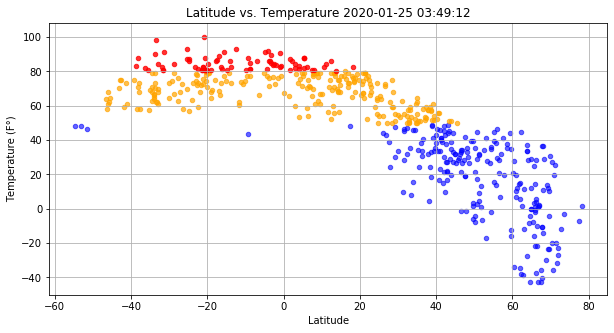

In [43]:
cities_df = pd.read_csv('cities.csv')

plt.figure(figsize=(10,5))
#colors = cm.rainbow(np.linspace(0, 1, len(cities_df)))
#colors = ['b', 'y','r']
cold = cities_df[cities_df['Max Temp'] < 50]
warm = cities_df[(cities_df['Max Temp'] >= 50) & (cities_df['Max Temp'] < 80)]
hot = cities_df[cities_df['Max Temp'] >=80]


#For a better visualization it was decided to assign colors for range of temperatures [Cold, Warm, Hot]
plt.scatter(cold['Lat'], cold['Max Temp'], color = 'b', s=20, alpha=0.6)
plt.scatter(warm['Lat'], warm['Max Temp'], color = 'orange', s=20, alpha=0.7)
plt.scatter(hot['Lat'], hot['Max Temp'], color = 'r', s=20, alpha=0.8)
plt.title(f"Latitude vs. Temperature {cities_df['parsed_time'].values[0]}")
plt.xlabel("Latitude")
plt.ylabel('Temperature (F\N{DEGREE SIGN})')
plt.grid()
plt.show()

#### Latitude vs. Humidity Plot

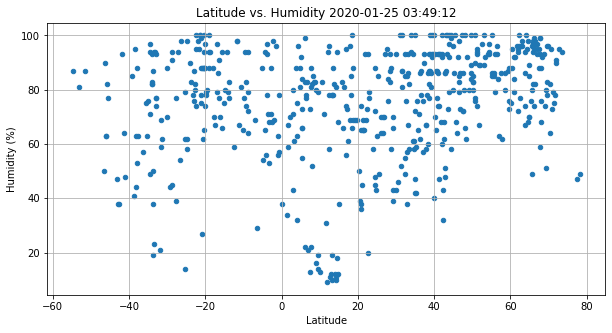

In [39]:
plt.figure(figsize=(10,5))
plt.scatter(cities_df.Lat, cities_df['Humidity'], s=20)
plt.title(f"Latitude vs. Humidity {cities_df['parsed_time'].values[0]}")
plt.xlabel("Latitude")
plt.ylabel('Humidity (%)')
plt.grid()
plt.show()

#### Latitude vs. Cloudiness Plot

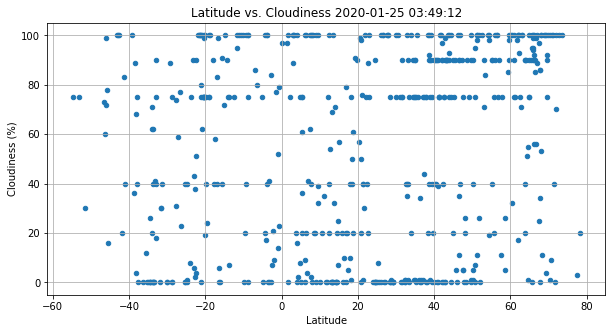

In [40]:
plt.figure(figsize=(10,5))
plt.scatter(cities_df.Lat, cities_df['Cloudiness'], s=20)
plt.title(f"Latitude vs. Cloudiness {cities_df['parsed_time'].values[0]}")
plt.xlabel("Latitude")
plt.ylabel('Cloudiness (%)')
plt.grid()
plt.show()

#### Latitude vs. Wind Speed Plot

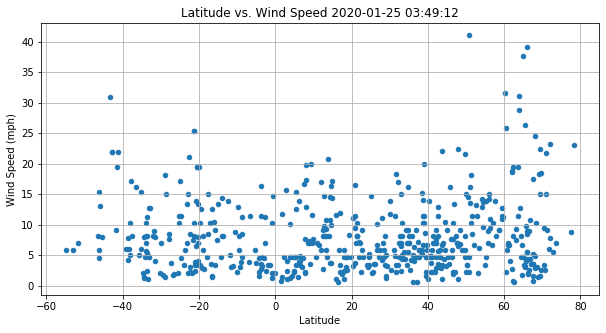

In [41]:
plt.figure(figsize=(10,5))
plt.scatter(cities_df.Lat, cities_df['Wind Speed'],s=20)
plt.title(f"Latitude vs. Wind Speed {cities_df['parsed_time'].values[0]}")
plt.xlabel("Latitude")
plt.ylabel('Wind Speed (mph)')
plt.grid()
plt.show()

## Linear Regression

### OPTIONAL: Create a function to create Linear Regression plots


In [9]:
# Create Northern and Southern Hemisphere DataFrames
n_hemis_df = cities_df[cities_df['Lat'] > 0]
s_hemis_df = cities_df[cities_df['Lat'] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

Slope = -0.5581176157295927
Intercept: = 60.23196462207307


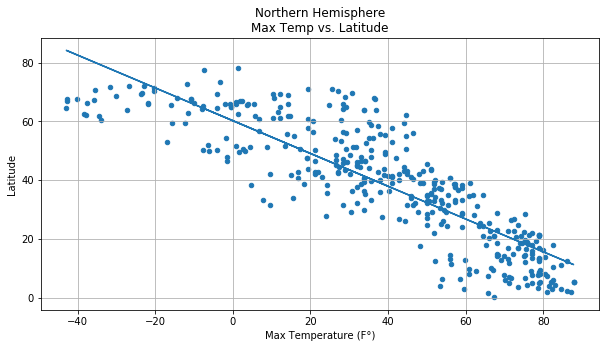

In [10]:
slope, intercept, r_value, p_value, stderr = linregress(n_hemis_df['Max Temp'], n_hemis_df['Lat'])
print(f"Slope = {slope}\nIntercept: = {intercept}")

fit_model = slope * n_hemis_df['Max Temp'] + intercept

plt.figure(figsize=(10,5))
plt.title('Northern Hemisphere\nMax Temp vs. Latitude')
plt.xlabel("Max Temperature (F\N{DEGREE SIGN})")
plt.ylabel('Latitude')

cold_n = n_hemis_df[n_hemis_df['Max Temp'] < 50]
warm_n = n_hemis_df[(n_hemis_df['Max Temp'] >= 50) & (n_hemis_df['Max Temp'] < 80)]
hot_n = n_hemis_df[n_hemis_df['Max Temp'] >=80]

plt.grid()
plt.scatter(n_hemis_df['Max Temp'],n_hemis_df['Lat'], s=20)
plt.plot(n_hemis_df['Max Temp'], fit_model)
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

Slope = 0.5737818610693317
Intercept: = -66.05064939290048


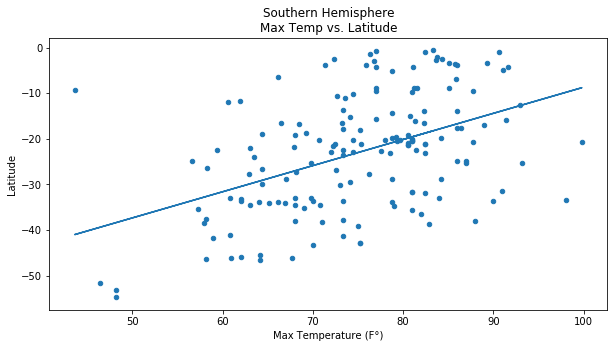

In [11]:
slope, intercept, r_value, p_value, stderr = linregress(s_hemis_df['Max Temp'],s_hemis_df['Lat'])
print(f"Slope = {slope}\nIntercept: = {intercept}")

fit_model = slope * s_hemis_df['Max Temp'] + intercept

plt.figure(figsize=(10,5))

plt.title('Southern Hemisphere\nMax Temp vs. Latitude')
plt.xlabel("Max Temperature (F\N{DEGREE SIGN})")
plt.ylabel('Latitude')

plt.scatter(s_hemis_df['Max Temp'],s_hemis_df['Lat'], s=20)
plt.plot(s_hemis_df['Max Temp'], fit_model)
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Slope = 0.40718026073434904
Intercept: = 7.5972626044815605


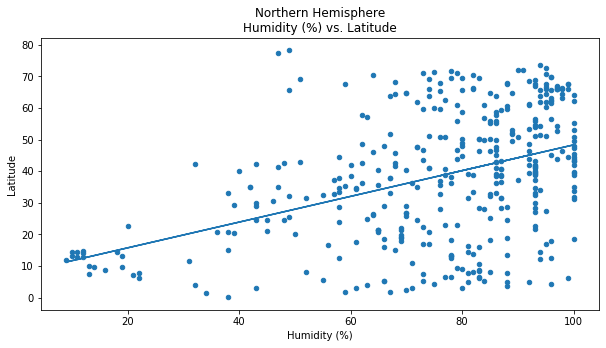

In [12]:
slope, intercept, r_value, p_value, stderr = linregress(n_hemis_df['Humidity'], n_hemis_df['Lat'])
print(f"Slope = {slope}\nIntercept: = {intercept}")

fit_model = slope * n_hemis_df['Humidity'] + intercept

plt.figure(figsize=(10,5))
plt.title('Northern Hemisphere\nHumidity (%) vs. Latitude')
plt.xlabel("Humidity (%)")
plt.ylabel('Latitude')

plt.scatter(n_hemis_df['Humidity'],n_hemis_df['Lat'], s=20)
plt.plot(n_hemis_df['Humidity'], fit_model)
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Slope = 0.10187362274937091
Intercept: = -30.654764521875087


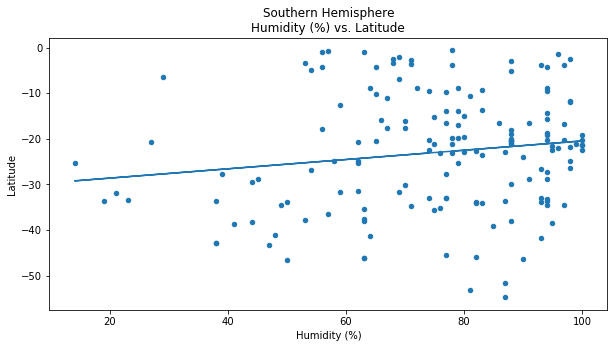

In [13]:
slope, intercept, r_value, p_value, stderr = linregress(s_hemis_df['Humidity'], s_hemis_df['Lat'])
print(f"Slope = {slope}\nIntercept: = {intercept}")

fit_model = slope * s_hemis_df['Humidity'] + intercept

plt.figure(figsize=(10,5))
plt.title('Southern Hemisphere\nHumidity (%) vs. Latitude')
plt.xlabel("Humidity (%)")
plt.ylabel('Latitude')
plt.scatter(s_hemis_df['Humidity'], s_hemis_df['Lat'], s=20)
plt.plot(s_hemis_df['Humidity'], fit_model)
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Slope = 0.13868348826415816
Intercept: = 30.697753786510994


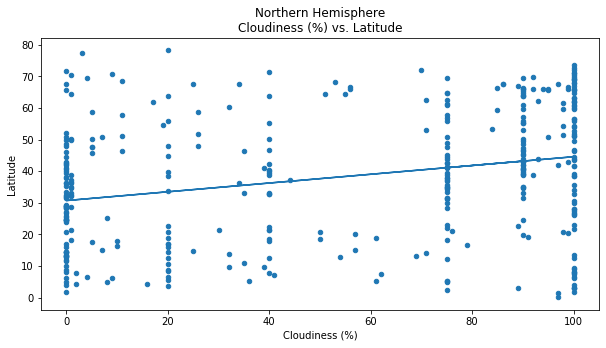

In [14]:
slope, intercept, r_value, p_value, stderr = linregress(n_hemis_df['Cloudiness'], n_hemis_df['Lat'])
print(f"Slope = {slope}\nIntercept: = {intercept}")

fit_model = slope * n_hemis_df['Cloudiness'] + intercept

plt.figure(figsize=(10,5))

plt.title('Northern Hemisphere\nCloudiness (%) vs. Latitude')
plt.xlabel("Cloudiness (%)")
plt.ylabel('Latitude')

plt.scatter(n_hemis_df['Cloudiness'],n_hemis_df['Lat'], s=20)
plt.plot(n_hemis_df['Cloudiness'], fit_model)
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Slope = 0.026914665677376153
Intercept: = -24.350270708121254


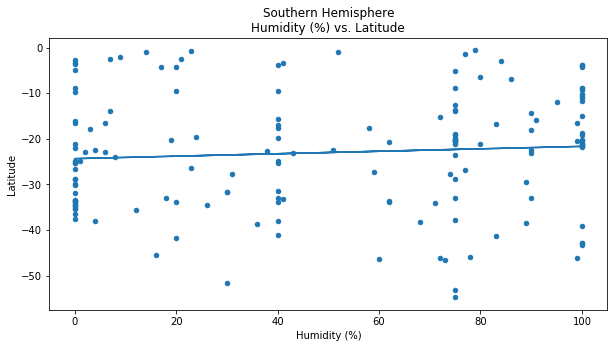

In [15]:
slope, intercept, r_value, p_value, stderr = linregress(s_hemis_df['Cloudiness'], s_hemis_df['Lat'])
print(f"Slope = {slope}\nIntercept: = {intercept}")

fit_model = slope * s_hemis_df['Cloudiness'] + intercept

plt.figure(figsize=(10,5))

plt.title('Southern Hemisphere\nHumidity (%) vs. Latitude')
plt.xlabel("Humidity (%)")
plt.ylabel('Latitude')

plt.scatter(s_hemis_df['Cloudiness'], s_hemis_df['Lat'], s=20)
plt.plot(s_hemis_df['Cloudiness'], fit_model)
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Slope = 0.6470783682253428
Intercept: = 33.16321658201889


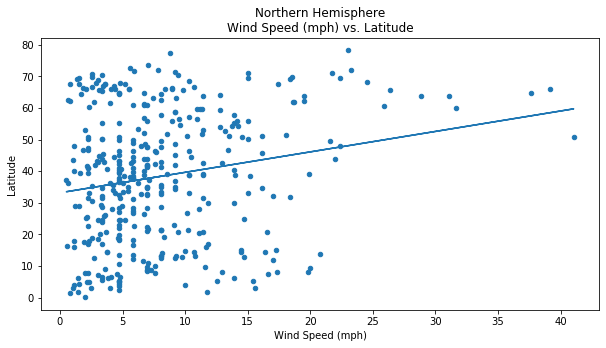

In [16]:
slope, intercept, r_value, p_value, stderr = linregress(n_hemis_df['Wind Speed'], n_hemis_df['Lat'])
print(f"Slope = {slope}\nIntercept: = {intercept}")

fit_model = slope * n_hemis_df['Wind Speed'] + intercept

plt.figure(figsize=(10,5))

plt.title('Northern Hemisphere\nWind Speed (mph) vs. Latitude')
plt.xlabel("Wind Speed (mph)")
plt.ylabel('Latitude')

plt.scatter(n_hemis_df['Wind Speed'],n_hemis_df['Lat'], s=20)
plt.plot(n_hemis_df['Wind Speed'], fit_model)
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Slope = -0.40352901982962347
Intercept: = -19.751080320051116


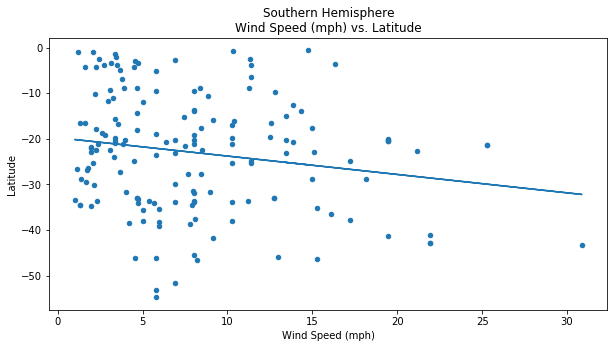

In [17]:
slope, intercept, r_value, p_value, stderr = linregress(s_hemis_df['Wind Speed'], s_hemis_df['Lat'])
print(f"Slope = {slope}\nIntercept: = {intercept}")

fit_model = slope * s_hemis_df['Wind Speed'] + intercept

plt.figure(figsize=(10,5))

plt.title('Southern Hemisphere\nWind Speed (mph) vs. Latitude')
plt.xlabel("Wind Speed (mph)")
plt.ylabel('Latitude')

plt.scatter(s_hemis_df['Wind Speed'], s_hemis_df['Lat'], s=20)
plt.plot(s_hemis_df['Wind Speed'], fit_model)
plt.show()